# Visualizing Geospatial Data

Fist, we import all the packages that might be useful for the lecture.

In [1]:
import pandas as pd
import numpy as np
import mgt2001

from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.mlab as mlab
import matplotlib.patches as mpatches # needed for waffle Charts
%matplotlib inline

import seaborn as sns
from PIL import Image # converting images into arrays
from pywaffle import Waffle
from wordcloud import WordCloud, STOPWORDS

## Folium
+ Folium is a powerful Python library that helps you create several types of Leaflet maps.
+ It enables both the binding of data to a map for choropleth visualizations as well as passing visualizations as markers on the map
+ The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox API keys.



### Creating a World Map

In [3]:
import folium

world_map = folium.Map()
world_map

In [9]:
world_map = folium.Map(
    location=[56.130, -106.35],
    zoom_start=4, 
    # tiles='Stamen Toner' # river and coastal area
    tiles='Stamen Terrain' # hill-shading and natural vegetation color
)
world_map

### Adding Markers

In [15]:
can_map = folium.Map(
    location=[56.130, -106.35],
    zoom_start=4, 
)

# Create a feature group
ontario = folium.map.FeatureGroup()
ontario.add_child(
        folium.features.CircleMarker(
        [51.25, -85.32], radius= 5, color='crimson', fill_color='Red')
)
can_map.add_child(ontario)

folium.Marker([51.25, -85.32], popup='Ontario').add_to(can_map)
can_map

### Choropleth Maps
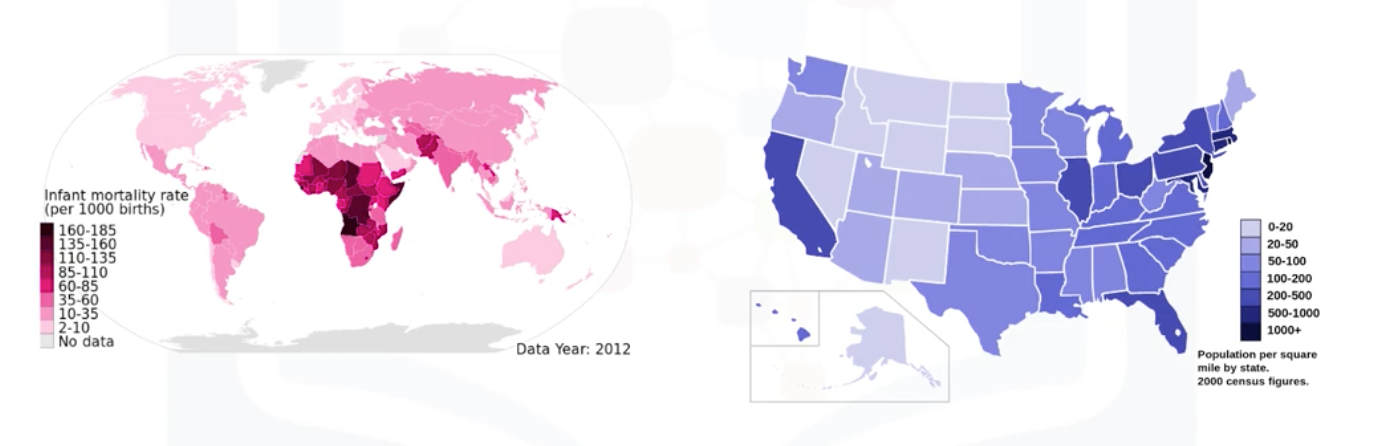

In [16]:
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                        sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can['Total'] = df_can.sum(axis=1)
df_can.set_index('Country', inplace=True)
# df_can.columns = list(map(str, df_can.columns)) --> to string
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [17]:
# create a plain world map
world_map = folium.Map(
    zoom_start=2,
    tiles='Mapbox Bright'
)

world_geo = r'world_countries.json'